<a href="https://colab.research.google.com/github/danendrafau/customer-segmentation/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Danendra_Fahar_Utama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**: Kaggle - [Shop Customer Data](https://www.kaggle.com/datasets/datascientistanna/customers-dataset/) (sesuai rekomendasi dicoding)
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
#load dataset
data = pd.read_csv("https://raw.githubusercontent.com/danendrafau/customer-segmentation/refs/heads/main/input_data/customers.csv")

#preview data
print(data.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
#cek baris kolom
data.shape

(2000, 8)

**Note:**

- Kolom "CustomerID", "Age", "Annual Income ($)", "Spending Score (1-100)", "Work Experience", dan "Family Size" bertipe numerikal (6 kolom).
- Kolom "Gender" dan "Profession" bertipe kategorikal (2 kolom).

In [4]:
#cek duplikat
print('Jumlah data duplikat: ', data.duplicated().sum())

#cek missing values
print('Jumlah missing value:')
print(data.isnull().sum())

Jumlah data duplikat:  0
Jumlah missing value:
CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64


count      2000.000000
mean     110731.821500
std       45739.536688
min           0.000000
25%       74572.000000
50%      110045.000000
75%      149092.750000
max      189974.000000
Name: Annual Income ($), dtype: float64


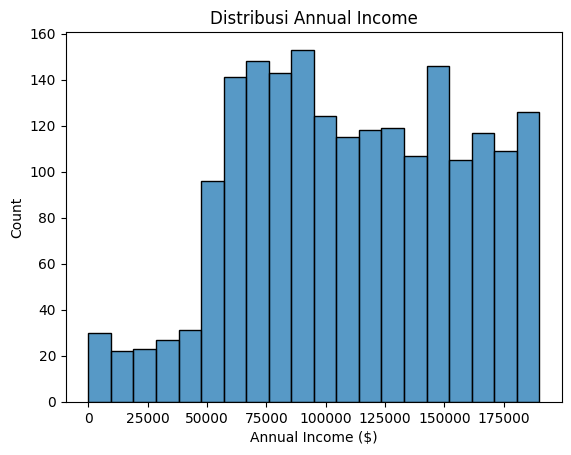

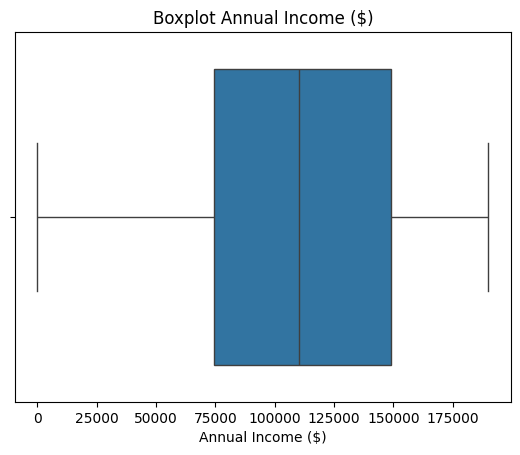

In [5]:
#stat desk
print(data['Annual Income ($)'].describe())

# Histogram
sns.histplot(data['Annual Income ($)'], bins=20)
plt.title('Distribusi Annual Income')
plt.show()

# Boxplot
sns.boxplot(x=data['Annual Income ($)'])
plt.title('Boxplot Annual Income ($)')
plt.show()

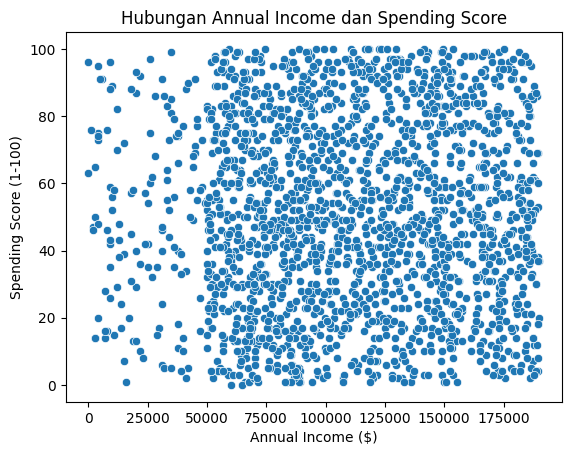

In [6]:
#scatter
sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', data=data)
plt.title('Hubungan Annual Income dan Spending Score')
plt.show()

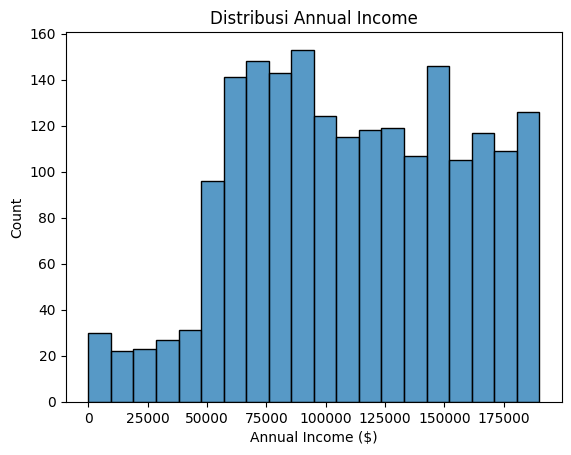

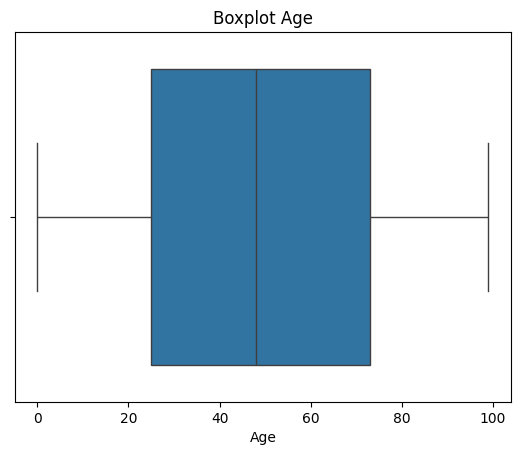

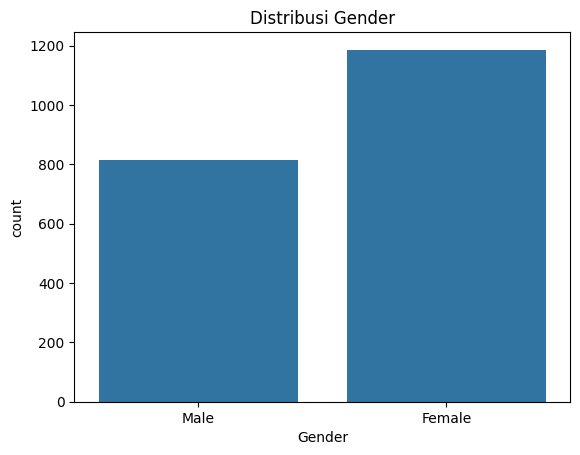

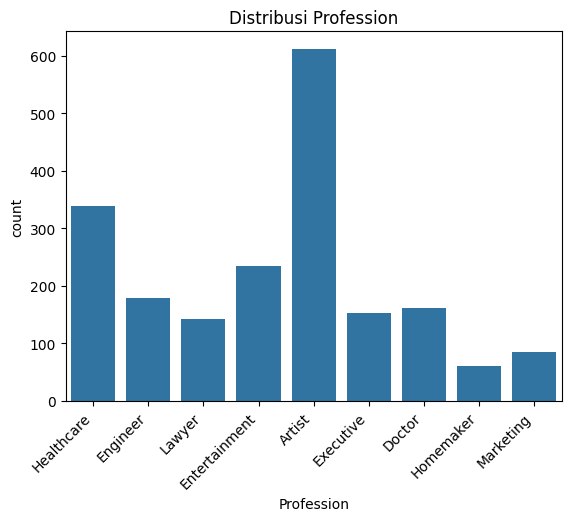

In [7]:
#histogram
sns.histplot(data['Annual Income ($)'], bins=20)
plt.title('Distribusi Annual Income')
plt.show()

#boxplot
sns.boxplot(x=data['Age'])
plt.title('Boxplot Age')
plt.show()

#batang
sns.countplot(x='Gender', data=data)
plt.title('Distribusi Gender')
plt.show()

#batang
sns.countplot(x='Profession', data=data)
plt.title('Distribusi Profession')
plt.xticks(rotation=45, ha='right')
plt.show()

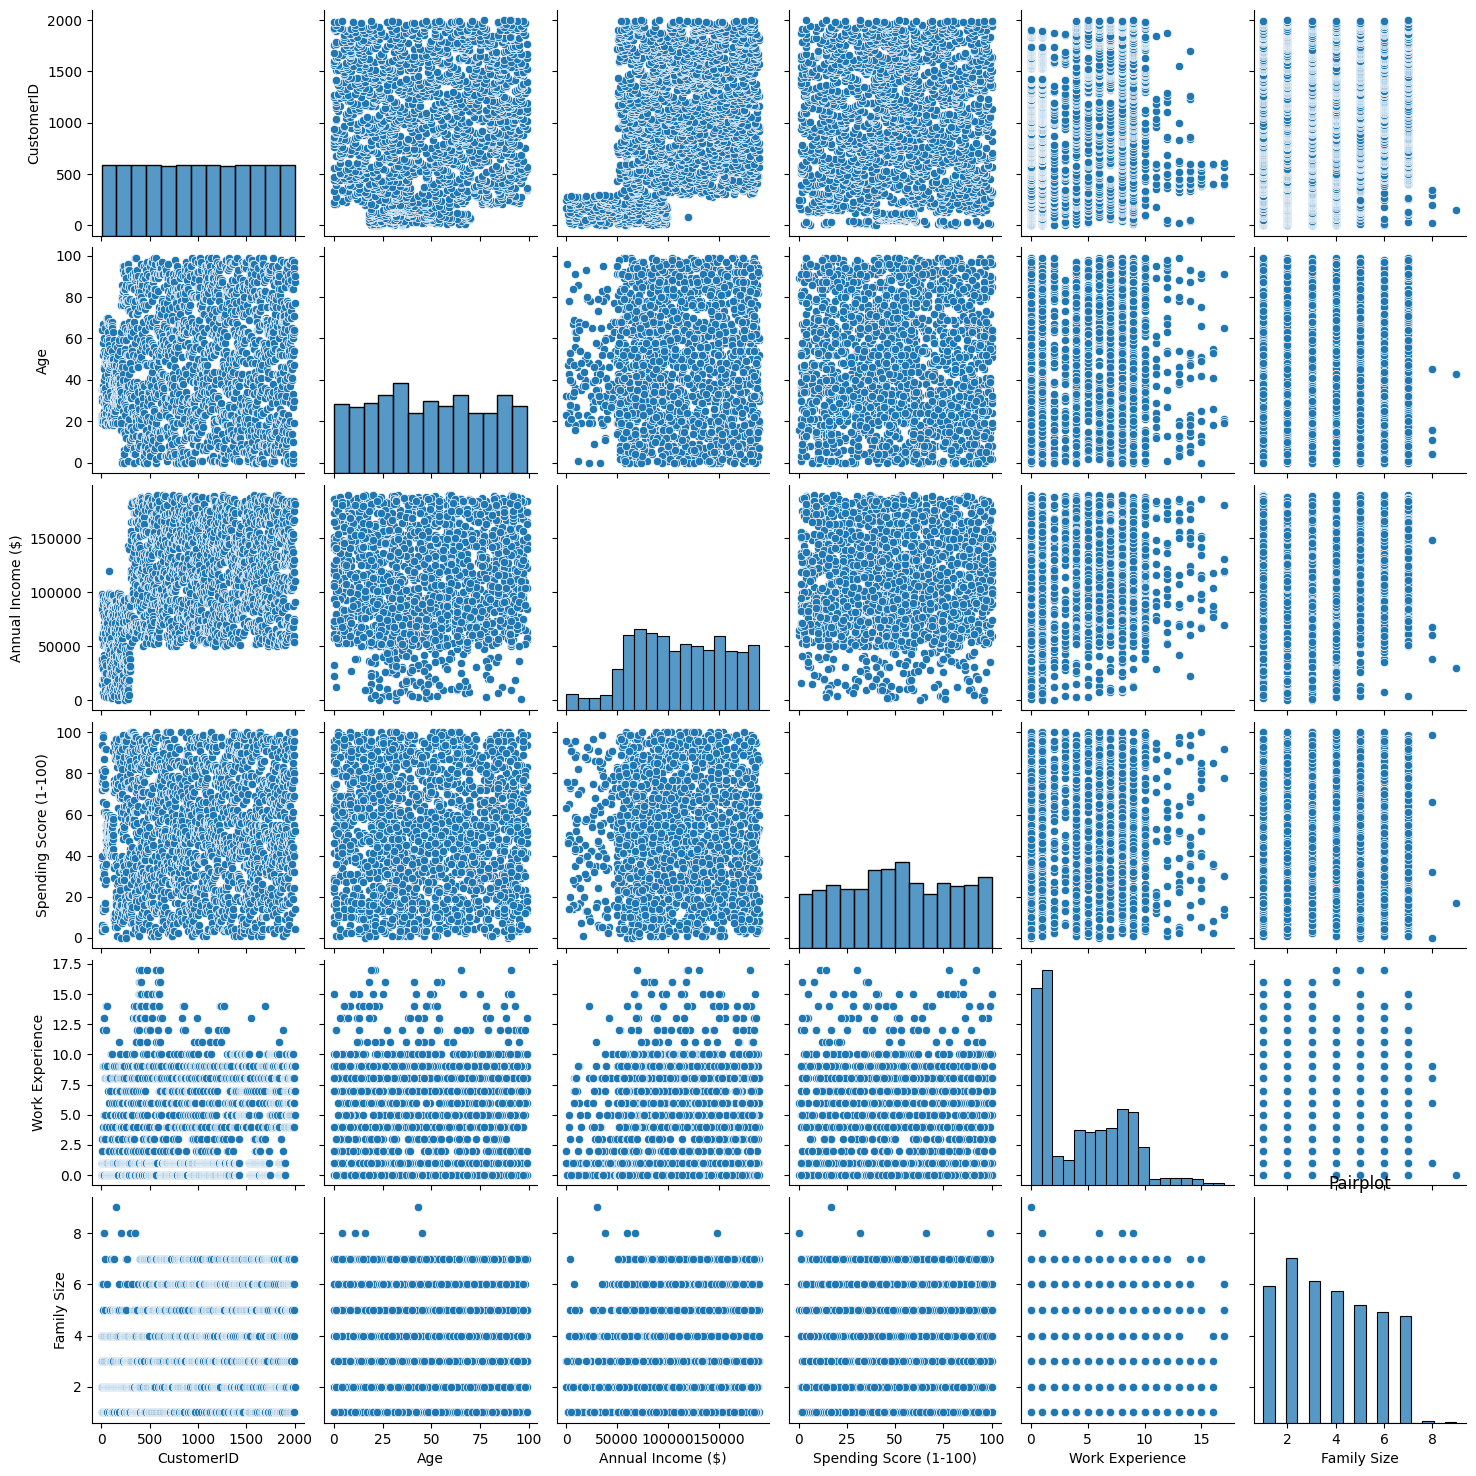

In [8]:
#pairplot
sns.pairplot(data)
plt.title('Pairplot')
plt.show()

In [9]:
# prompt: hitung data pada kolom "Age" yang bernilai <=10 dan =>90

# Hitung data pada kolom "Age" yang bernilai <=10 dan >=90
bocil = data[data['Age'] <= 10].shape[0]
tuwir = data[data['Age'] >= 90].shape[0]

print(f"Jumlah data dengan usia <= 10: {bocil}")
print(f"Jumlah data dengan usia >= 90: {tuwir}")

Jumlah data dengan usia <= 10: 197
Jumlah data dengan usia >= 90: 194


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [10]:
#hapus kolom tidak terpakai
data = data.drop(['CustomerID', 'Profession', 'Work Experience'], axis=1)

#preview data
print(data.head())
#cek baris kolom
data.shape
#cek duplikat
print('Jumlah data duplikat: ', data.duplicated().sum())

#cek missing values
print('Jumlah missing value:')
print(data.isnull().sum())

   Gender  Age  Annual Income ($)  Spending Score (1-100)  Family Size
0    Male   19              15000                      39            4
1    Male   21              35000                      81            3
2  Female   20              86000                       6            1
3  Female   23              59000                      77            2
4  Female   31              38000                      40            6
Jumlah data duplikat:  1
Jumlah missing value:
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Family Size               0
dtype: int64


In [11]:
#rename kolom
data.rename(columns={'Gender': 'gender',
                     'Age': 'age',
                     'Annual Income ($)': 'annual_income',
                     'Spending Score (1-100)': 'spending_score',
                     'Family Size': 'family_size'}, inplace=True)
print(data.head())

   gender  age  annual_income  spending_score  family_size
0    Male   19          15000              39            4
1    Male   21          35000              81            3
2  Female   20          86000               6            1
3  Female   23          59000              77            2
4  Female   31          38000              40            6


**NOTE:**

Saya **mencurigai** beberapa data pada kolom "Age" yang bernilai kecil bahkan 0, yang akan saya cek dan analisa terlebih dahulu.

Empty DataFrame
Columns: [gender, age, annual_income, spending_score, family_size]
Index: []


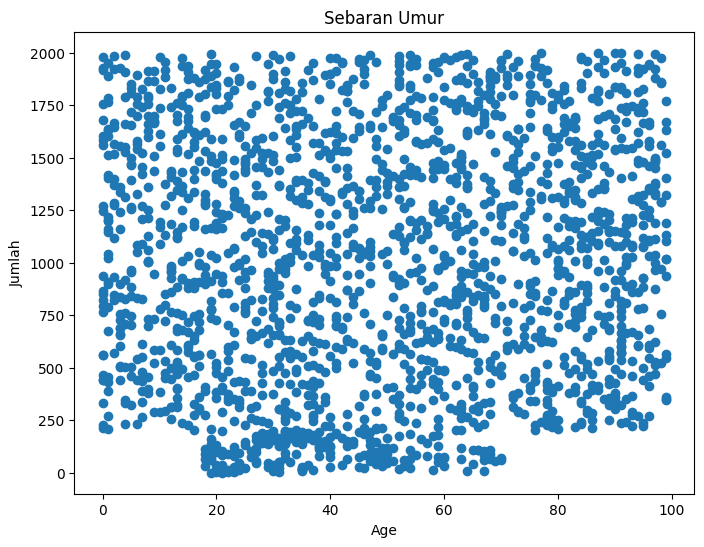

In [12]:
''' cek outlier'''
#IQR
Q1 = np.percentile(data['annual_income'], 25, interpolation='midpoint')
Q3 = np.percentile(data['annual_income'], 75, interpolation='midpoint')
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cek_outliers = data[(data['annual_income'] < lower_bound) | (data['annual_income'] > upper_bound)]

print(cek_outliers)

#scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data.index)
plt.xlabel("Age")
plt.ylabel("Jumlah")
plt.title("Sebaran Umur")
plt.show()

**NOTE:**

Terdapat banyak data yang kurang masuk akal seperti usia <=10 tahun dan >=90 tahun. Oleh karena itu saya akan menetapkan beberapa aturan untuk outlier berdasarkan usia ("Age").

- Berdasarkan [Konvensi ILO](https://ilostat.ilo.org/methods/concepts-and-definitions/description-labour-force-statistics/), usia minimum untuk bekerja pada umumnya adalah 15 tahun.
- Menurut data United Nations Population Division yang dirangkum dalam Worldometers ([Goodstats.id](https://goodstats.id/article/angka-harapan-hidup-asean-2024-VNu5v)), angka harapan hidup global di 2024 mencapai 73,3 tahun.

Berdasarkan hasil riset tersebut, maka data pada kolom "Age" dengan nilai <15 dan >73 akan dieliminasi.

In [13]:
#hapus data <15 dan >73 pada "Age"
data = data[(data['age'] >= 15) & (data['age'] <= 73)]

In [14]:
num_rows = data.shape[0]
print(f"\nTotal baris: {num_rows}")


Total baris: 1229


In [15]:
#def batas kategori umur
bins = [15, 24, 34, 44, 54, float('inf')]  # float('inf') untuk batas tak hingga
labels = ['Remaja', 'Dewasa Muda', 'Dewasa', 'Paruh Baya', 'Lansia']

#'income_group' menggunakan qcut
data['income_group'] = pd.qcut(data['annual_income'], q=4, labels=['Rendah', 'Menengah Bawah', 'Menengah Atas', 'Tinggi'])

#'spending_group' menggunakan qcut
data['spending_group'] = pd.qcut(data['spending_score'], q=4, labels=['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'])

#'age_group'
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)
print(data[['age', 'age_group', 'annual_income', 'income_group', 'spending_score', 'spending_group']].head())  # Tampilkan beberapa baris data untuk verifikasi


   age    age_group  annual_income    income_group  spending_score  \
0   19       Remaja          15000          Rendah              39   
1   21       Remaja          35000          Rendah              81   
2   20       Remaja          86000  Menengah Bawah               6   
3   23       Remaja          59000          Rendah              77   
4   31  Dewasa Muda          38000          Rendah              40   

  spending_group  
0         Sedang  
1  Sangat Tinggi  
2         Rendah  
3  Sangat Tinggi  
4         Sedang  


In [16]:
#buat income_per_family_member
data['income_per_family_member'] = data['annual_income'] / data['family_size']

#buat spending_ratio
data['spending_ratio'] = data['spending_score'] / data['annual_income']

print(data.head())

   gender  age  annual_income  spending_score  family_size    income_group  \
0    Male   19          15000              39            4          Rendah   
1    Male   21          35000              81            3          Rendah   
2  Female   20          86000               6            1  Menengah Bawah   
3  Female   23          59000              77            2          Rendah   
4  Female   31          38000              40            6          Rendah   

  spending_group    age_group  income_per_family_member  spending_ratio  
0         Sedang       Remaja               3750.000000        0.002600  
1  Sangat Tinggi       Remaja              11666.666667        0.002314  
2         Rendah       Remaja              86000.000000        0.000070  
3  Sangat Tinggi       Remaja              29500.000000        0.001305  
4         Sedang  Dewasa Muda               6333.333333        0.001053  


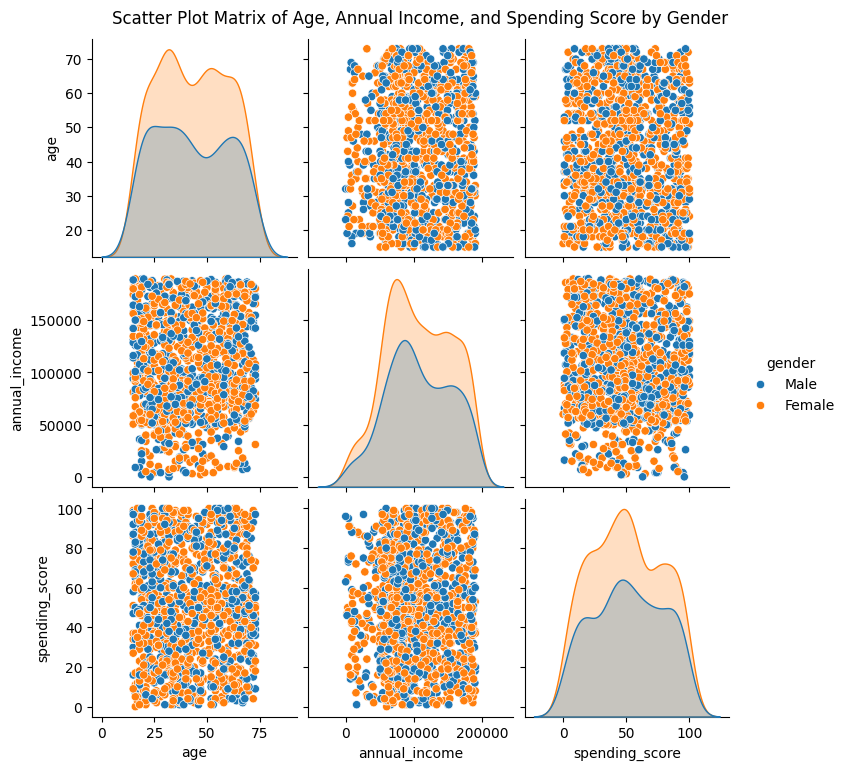

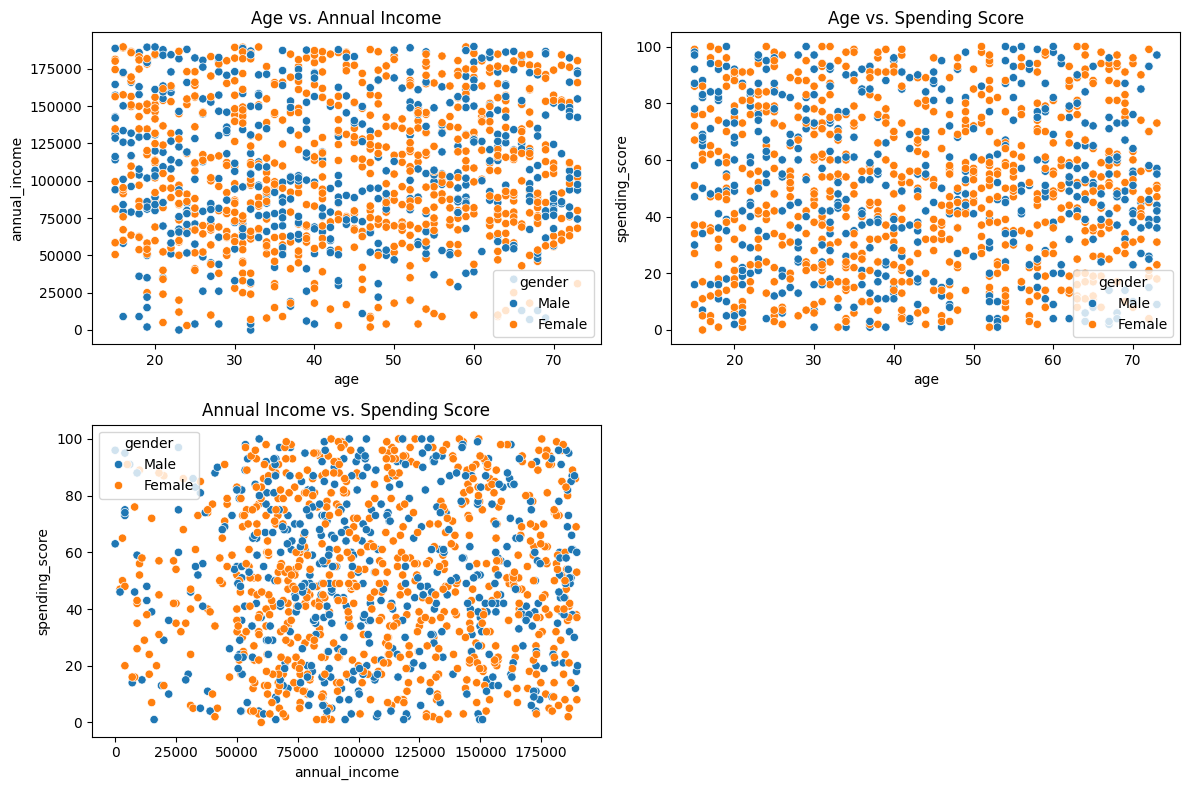

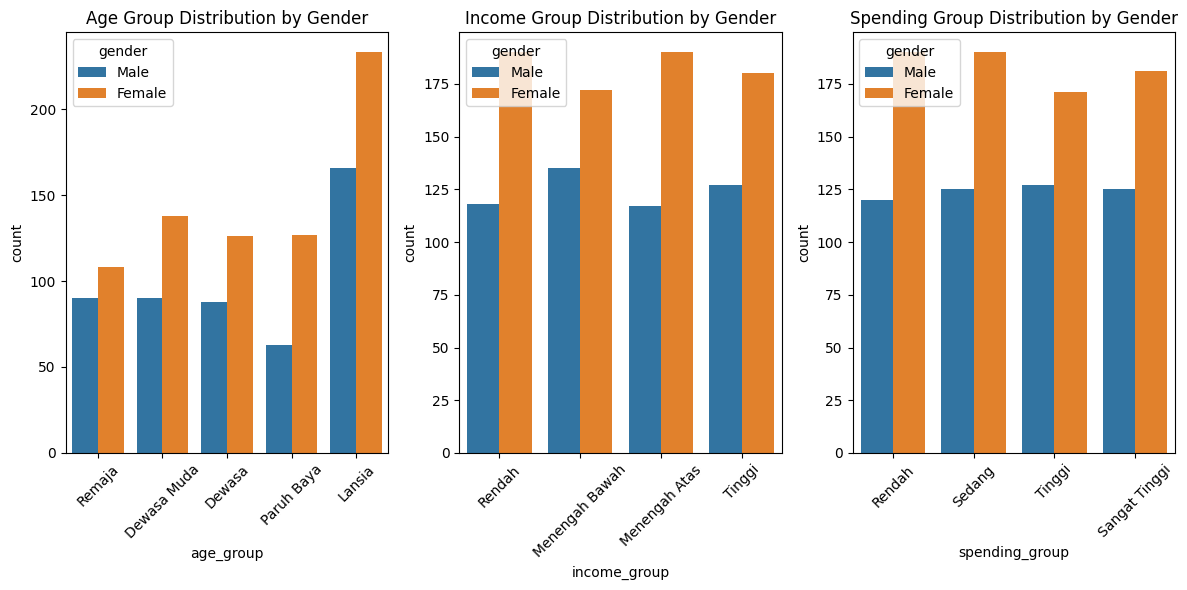

In [17]:
#scatter matrix
sns.pairplot(data, hue='gender', vars=['age', 'annual_income', 'spending_score'])
plt.suptitle('Scatter Plot Matrix of Age, Annual Income, and Spending Score by Gender', y=1.02)
plt.show()

#scatter indie
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='age', y='annual_income', hue='gender', data=data)
plt.title('Age vs. Annual Income')

plt.subplot(2, 2, 2)
sns.scatterplot(x='age', y='spending_score', hue='gender', data=data)
plt.title('Age vs. Spending Score')

plt.subplot(2, 2, 3)
sns.scatterplot(x='annual_income', y='spending_score', hue='gender', data=data)
plt.title('Annual Income vs. Spending Score')


plt.tight_layout()
plt.show()

#visual 'gender', 'age_group', 'income_group', and 'spending_group'
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.countplot(x='age_group', hue='gender', data=data)
plt.title('Age Group Distribution by Gender')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.countplot(x='income_group', hue='gender', data=data)
plt.title('Income Group Distribution by Gender')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.countplot(x='spending_group', hue='gender', data=data)
plt.title('Spending Group Distribution by Gender')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [18]:
#onehot
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='if_binary') # Changed 'sparse' to 'sparse_output' to control output format # drop='if_binary' untuk menghindari dummy variable trap pada kolom biner seperti 'gender'
categorical_features = ['gender', 'age_group', 'income_group', 'spending_group']
encoded_data = encoder.fit_transform(data[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features), index=data.index)

data = pd.concat([data, encoded_df], axis=1)
data = data.drop(columns=categorical_features)
print(data.head())

   age  annual_income  spending_score  family_size  income_per_family_member  \
0   19          15000              39            4               3750.000000   
1   21          35000              81            3              11666.666667   
2   20          86000               6            1              86000.000000   
3   23          59000              77            2              29500.000000   
4   31          38000              40            6               6333.333333   

   spending_ratio  gender_Male  age_group_Dewasa  age_group_Dewasa Muda  \
0        0.002600          1.0               0.0                    0.0   
1        0.002314          1.0               0.0                    0.0   
2        0.000070          0.0               0.0                    0.0   
3        0.001305          0.0               0.0                    0.0   
4        0.001053          0.0               0.0                    1.0   

   age_group_Lansia  age_group_Paruh Baya  age_group_Remaja  \
0    

In [19]:
#cek missing values
print('Jumlah missing value setelah semua proses:')
print(data.isnull().sum())

#cek NaN
print("\nJumlah NaN values setelah semua proses:\n", data.isna().sum())

#cek (inf)
print("\nJumlah nilai tak hingga (infinity):\n", np.isinf(data).sum())

Jumlah missing value setelah semua proses:
age                             0
annual_income                   0
spending_score                  0
family_size                     0
income_per_family_member        0
spending_ratio                  0
gender_Male                     0
age_group_Dewasa                0
age_group_Dewasa Muda           0
age_group_Lansia                0
age_group_Paruh Baya            0
age_group_Remaja                0
income_group_Menengah Atas      0
income_group_Menengah Bawah     0
income_group_Rendah             0
income_group_Tinggi             0
spending_group_Rendah           0
spending_group_Sangat Tinggi    0
spending_group_Sedang           0
spending_group_Tinggi           0
dtype: int64

Jumlah NaN values setelah semua proses:
 age                             0
annual_income                   0
spending_score                  0
family_size                     0
income_per_family_member        0
spending_ratio                  0
gender_Male       

In [20]:
#hapus bernilai "inf" kolom spending_ratio
data = data[~np.isinf(data['spending_ratio'])]

print(data.head())

#cek missing values
print('Jumlah missing value setelah semua proses:')
print(data.isnull().sum())

#cek NaN
print("\nJumlah NaN values setelah semua proses:\n", data.isna().sum())

#cek nilai tak hingga (infinity)
print("\nJumlah nilai tak hingga (infinity):\n", np.isinf(data).sum())

   age  annual_income  spending_score  family_size  income_per_family_member  \
0   19          15000              39            4               3750.000000   
1   21          35000              81            3              11666.666667   
2   20          86000               6            1              86000.000000   
3   23          59000              77            2              29500.000000   
4   31          38000              40            6               6333.333333   

   spending_ratio  gender_Male  age_group_Dewasa  age_group_Dewasa Muda  \
0        0.002600          1.0               0.0                    0.0   
1        0.002314          1.0               0.0                    0.0   
2        0.000070          0.0               0.0                    0.0   
3        0.001305          0.0               0.0                    0.0   
4        0.001053          0.0               0.0                    1.0   

   age_group_Lansia  age_group_Paruh Baya  age_group_Remaja  \
0    

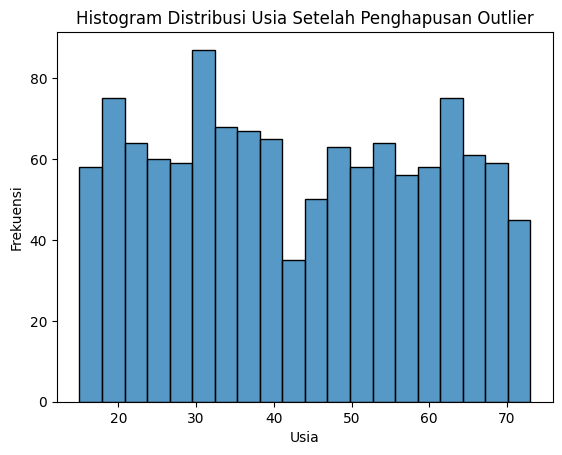

count    1227.000000
mean       43.140994
std        16.876304
min        15.000000
25%        29.000000
50%        42.000000
75%        58.000000
max        73.000000
Name: age, dtype: float64


In [21]:
#histogram
sns.histplot(data['age'], bins=20)
plt.title('Histogram Distribusi Usia Setelah Penghapusan Outlier')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

#statistik
print(data['age'].describe())

In [22]:
#normalisasi
scaler = MinMaxScaler()
features_to_normalize = ['age', 'annual_income', 'spending_score', 'family_size', 'income_per_family_member', 'spending_ratio']
data.loc[:, features_to_normalize] = scaler.fit_transform(data.loc[:, features_to_normalize]).astype('float64')
print(data.head())

        age  annual_income  spending_score  family_size  \
0  0.068966       0.069169            0.39        0.375   
1  0.103448       0.175583            0.81        0.250   
2  0.086207       0.446939            0.06        0.000   
3  0.137931       0.303280            0.77        0.125   
4  0.275862       0.191545            0.40        0.625   

   income_per_family_member  spending_ratio  gender_Male  age_group_Dewasa  \
0                  0.016824        0.109474          1.0               0.0   
1                  0.058728        0.097444          1.0               0.0   
2                  0.452179        0.002938          0.0               0.0   
3                  0.153121        0.054951          0.0               0.0   
4                  0.030498        0.044321          0.0               0.0   

   age_group_Dewasa Muda  age_group_Lansia  age_group_Paruh Baya  \
0                    0.0               0.0                   0.0   
1                    0.0               0

<ipython-input-22-399f9c8708d3>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.06896552 0.10344828 0.0862069  ... 0.84482759 0.06896552 0.96551724]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, features_to_normalize] = scaler.fit_transform(data.loc[:, features_to_normalize]).astype('float64')
<ipython-input-22-399f9c8708d3>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.06916917 0.17558328 0.44693926 ... 0.92183352 0.27732049 0.97042752]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, features_to_normalize] = scaler.fit_transform(data.loc[:, features_to_normalize]).astype('float64')
<ipython-input-22-399f9c8708d3>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. 

In [23]:
print("Missing values per kolom:\n", data.isnull().sum())
print("\nJumlah NaN values:\n", data.isna().sum())
print("\nTipe data:\n", data.dtypes)
num_rows = data.shape[0]
print(f"\nTotal baris: {num_rows}")

Missing values per kolom:
 age                             0
annual_income                   0
spending_score                  0
family_size                     0
income_per_family_member        0
spending_ratio                  0
gender_Male                     0
age_group_Dewasa                0
age_group_Dewasa Muda           0
age_group_Lansia                0
age_group_Paruh Baya            0
age_group_Remaja                0
income_group_Menengah Atas      0
income_group_Menengah Bawah     0
income_group_Rendah             0
income_group_Tinggi             0
spending_group_Rendah           0
spending_group_Sangat Tinggi    0
spending_group_Sedang           0
spending_group_Tinggi           0
dtype: int64

Jumlah NaN values:
 age                             0
annual_income                   0
spending_score                  0
family_size                     0
income_per_family_member        0
spending_ratio                  0
gender_Male                     0
age_group_Dewasa     

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [24]:
#pilih fitur untuk model
fitur_clustering = ['gender_Male', 'age', 'annual_income', 'spending_score', 'family_size']
X = data[fitur_clustering]
print(X.head())

   gender_Male       age  annual_income  spending_score  family_size
0          1.0  0.068966       0.069169            0.39        0.375
1          1.0  0.103448       0.175583            0.81        0.250
2          0.0  0.086207       0.446939            0.06        0.000
3          0.0  0.137931       0.303280            0.77        0.125
4          0.0  0.275862       0.191545            0.40        0.625


In [25]:
#init KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

#train model
kmeans.fit(X)

#create dataframe
result_df = X.copy()

#print dataframe
result_df

,gender_Male,age,annual_income,spending_score,family_size
0,1.0,0.068966,0.069169,0.39,0.375
1,1.0,0.103448,0.175583,0.81,0.250
2,0.0,0.086207,0.446939,0.06,0.000
3,0.0,0.137931,0.303280,0.77,0.125
4,0.0,0.275862,0.191545,0.40,0.625
...,...,...,...,...,...
1989,0.0,0.551724,0.389970,0.55,0.750
1990,0.0,0.258621,0.877826,0.69,0.250
1993,0.0,0.844828,0.921834,1.00,0.500
1994,0.0,0.068966,0.277320,0.89,0.250


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

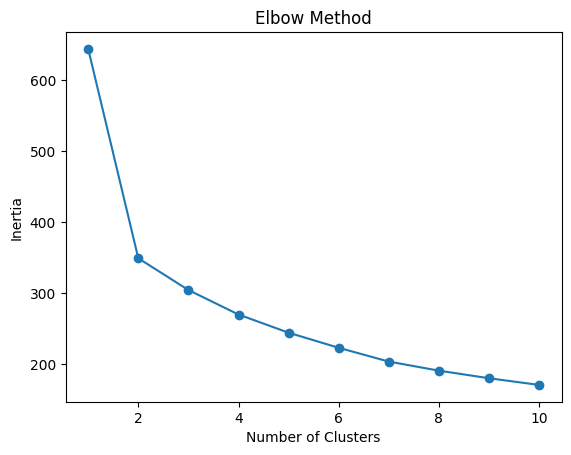

In [26]:
#elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

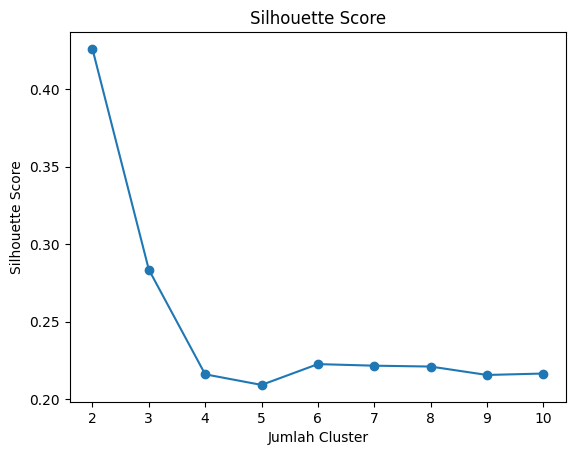

Optimal number of clusters based on Silhouette Score: 2


In [27]:
#siluet
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.show()

#cluster optimal
optimal_n_clusters = np.argmax(silhouette_scores) + 2
print(f"Optimal number of clusters based on Silhouette Score: {optimal_n_clusters}")

In [28]:
#uji ulang
optimal_kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init=10)
optimal_kmeans.fit(X)

#hitung skor
optimal_silhouette_avg = silhouette_score(X, optimal_kmeans.labels_)
print(f"Silhouette Score for optimal model: {optimal_silhouette_avg}")

#cluster label
result_df['cluster1'] = optimal_kmeans.labels_
print(result_df.head())

Silhouette Score for optimal model: 0.42581844886015713
   gender_Male       age  annual_income  spending_score  family_size  cluster1
0          1.0  0.068966       0.069169            0.39        0.375         0
1          1.0  0.103448       0.175583            0.81        0.250         0
2          0.0  0.086207       0.446939            0.06        0.000         1
3          0.0  0.137931       0.303280            0.77        0.125         1
4          0.0  0.275862       0.191545            0.40        0.625         1


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [29]:
#daftar nama-nama kolom
data.columns

Index(['age', 'annual_income', 'spending_score', 'family_size',
       'income_per_family_member', 'spending_ratio', 'gender_Male',
       'age_group_Dewasa', 'age_group_Dewasa Muda', 'age_group_Lansia',
       'age_group_Paruh Baya', 'age_group_Remaja',
       'income_group_Menengah Atas', 'income_group_Menengah Bawah',
       'income_group_Rendah', 'income_group_Tinggi', 'spending_group_Rendah',
       'spending_group_Sangat Tinggi', 'spending_group_Sedang',
       'spending_group_Tinggi'],
      dtype='object')

In [30]:
#feature selection ulang
fitur_clustering2 = ['income_group_Menengah Atas', 'income_group_Menengah Bawah',
       'income_group_Rendah', 'income_group_Tinggi', 'spending_ratio','family_size']
X = data[fitur_clustering2]
print(X.head())

   income_group_Menengah Atas  income_group_Menengah Bawah  \
0                         0.0                          0.0   
1                         0.0                          0.0   
2                         0.0                          1.0   
3                         0.0                          0.0   
4                         0.0                          0.0   

   income_group_Rendah  income_group_Tinggi  spending_ratio  family_size  
0                  1.0                  0.0        0.109474        0.375  
1                  1.0                  0.0        0.097444        0.250  
2                  0.0                  0.0        0.002938        0.000  
3                  1.0                  0.0        0.054951        0.125  
4                  1.0                  0.0        0.044321        0.625  


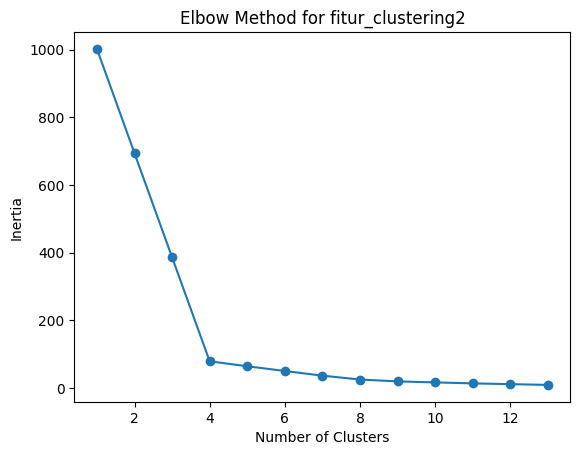

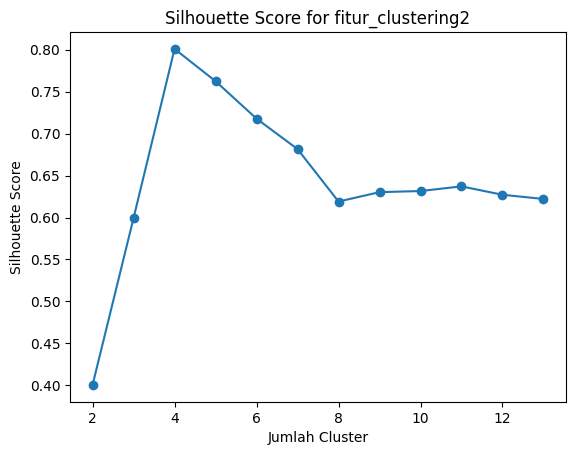

Optimal number of clusters based on Silhouette Score for fitur_clustering2: 4
Silhouette Score for optimal model with fitur_clustering2: 0.8008255836306791
Silhouette Score: 0.8008255836306791
   income_group_Menengah Atas  income_group_Menengah Bawah  \
0                         0.0                          0.0   
1                         0.0                          0.0   
2                         0.0                          1.0   
3                         0.0                          0.0   
4                         0.0                          0.0   

   income_group_Rendah  income_group_Tinggi  spending_ratio  family_size  \
0                  1.0                  0.0        0.109474        0.375   
1                  1.0                  0.0        0.097444        0.250   
2                  0.0                  0.0        0.002938        0.000   
3                  1.0                  0.0        0.054951        0.125   
4                  1.0                  0.0        0.0

In [31]:
#elbow method
inertia = []
for i in range(1, 14):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 14), inertia, marker='o')
plt.title('Elbow Method for fitur_clustering2')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

#siluet
silhouette_scores = []
for n_clusters in range(2, 14):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 14), silhouette_scores, marker='o')
plt.title('Silhouette Score for fitur_clustering2')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.show()

#cluster optimal
optimal_n_clusters = np.argmax(silhouette_scores) + 2
print(f"Optimal number of clusters based on Silhouette Score for fitur_clustering2: {optimal_n_clusters}")

#uji ulang KMeans dengan fitur_clustering2
optimal_kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init=10)
optimal_kmeans.fit(X)

#hitung skor siluet
optimal_silhouette_avg = silhouette_score(X, optimal_kmeans.labels_)
print(f"Silhouette Score for optimal model with fitur_clustering2: {optimal_silhouette_avg}")

#buat dataframe baru untuk hasil clustering dengan fitur_clustering2
result_df2 = X.copy()
result_df2['cluster'] = optimal_kmeans.labels_

#tampilkan score dan label cluster
print(f"Silhouette Score: {optimal_silhouette_avg}")
print(result_df2.head())

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

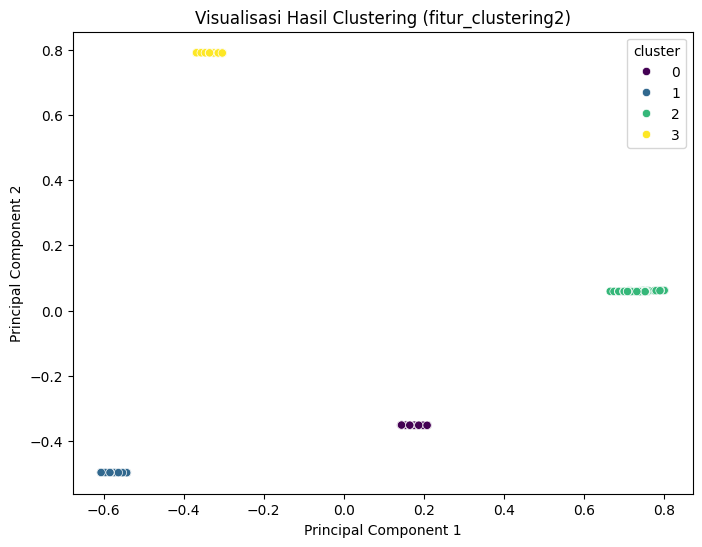

In [32]:
#visualisasi
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=result_df2['cluster'], palette='viridis')
plt.title('Visualisasi Hasil Clustering (fitur_clustering2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [33]:
#copy result_df2
cluster_stats = result_df2.copy()

#rename
cluster_stats = cluster_stats.rename(columns={
    'income_group_Menengah Atas': 'income_MA',
    'income_group_Menengah Bawah': 'income_MB',
    'income_group_Rendah': 'income_R',
    'income_group_Tinggi': 'income_T'
})

#grouping
cluster_desc = cluster_stats.groupby('cluster').agg(['mean', 'std', 'min', 'max'])
cluster_desc

income_MA                income_MB                income_R       ...  \
             mean  std  min  max      mean  std  min  max     mean  std  ...   
cluster                                                                  ...   
0             0.0  0.0  0.0  0.0       1.0  0.0  1.0  1.0      0.0  0.0  ...   
1             0.0  0.0  0.0  0.0       0.0  0.0  0.0  0.0      0.0  0.0  ...   
2             0.0  0.0  0.0  0.0       0.0  0.0  0.0  0.0      1.0  0.0  ...   
3             1.0  0.0  1.0  1.0       0.0  0.0  0.0  0.0      0.0  0.0  ...   

        income_T      spending_ratio                                \
             min  max           mean       std       min       max   
cluster                                                              
0            0.0  0.0       0.024876  0.013538  0.000446  0.057070   
1            1.0  1.0       0.012518  0.006895  0.000279  0.028187   
2            0.0  0.0       0.081818  0.152496  0.000000  1.000000   
3            0.0  0.0       0.017819  0.009828  0.000316  0.040796   

        family_size                       
               mean       std  min   max  
cluster                                   
0          0.325326  0.248311  0.0  0.75  
1          0.375407  0.244318  0.0  0.75  
2          0.290441  0.227578  0.0  1.00  
3          0.360342  0.250386  0.0  0.75  

[4 rows x 24 columns]

In [34]:
cluster_means = result_df2.groupby('cluster').mean()
#rename
cluster_means = cluster_means.rename(columns={
    'income_group_Menengah Atas': 'income_MA',
    'income_group_Menengah Bawah': 'income_MB',
    'income_group_Rendah': 'income_R',
    'income_group_Tinggi': 'income_T'
})
cluster_means

,income_MA,income_MB,income_R,income_T,spending_ratio,family_size
cluster,,,,,,
0,0.0,1.0,0.0,0.0,0.024876,0.325326
1,0.0,0.0,0.0,1.0,0.012518,0.375407
2,0.0,0.0,1.0,0.0,0.081818,0.290441
3,1.0,0.0,0.0,0.0,0.017819,0.360342


Tulis hasil interpretasinya di sini.
1. Cluster 0:
  - **income_MB** = 1
  - **spending_ratio** rendah
  - **family_size** sedang
  - **Profil:** Keluarga Muda Berhemat (Pendapatan menengah bawah, keluarga sedang, hemat)
  - **Analisis:** Tawarkan produk dengan harga terjangkau, promo bundling, dan program loyalitas yang menarik. Gunakan saluran pemasaran digital dan media sosial yang populer di kalangan anak muda. Tekankan nilai tambah produk seperti kualitas dan daya tahan.
2. Cluster 1:
  - **income_T** = 1
  - **spending_ratio** sangat rendah
  - **family_size** agak besar
  - **Profil:** Keluarga Kaya Konservatif (Pendapatan tinggi, keluarga besar, sangat hemat)
  - **Analisis:** Tawarkan produk premium dengan kualitas terbaik. Gunakan saluran pemasaran eksklusif seperti majalah kelas atas dan email marketing. Tekankan keunggulan produk dalam hal prestise dan kemewahan.
3. Cluster 2:
  - **income_R** = 1
  - **spending_ratio** tinggi
  - **family_size** kecil
  - **Profil:** Pasangan Muda Urban (Pendapatan rendah, keluarga kecil, boros)
  - **Analisis:** Tawarkan produk dengan desain menarik dan mengikuti tren terbaru. Gunakan influencer marketing dan iklan online yang targeting ke demografi muda. Buat program pembayaran yang fleksibel seperti cicilan tanpa bunga.
4. Cluster 3:
  - income_MA = 1
  - spending_ratio rendah
  - **family_size** agak besar
  - **Profil:** Keluarga Stabil (Pendapatan menengah atas, keluarga besar, hemat)
  - **Analisis:** Tawarkan produk yang memenuhi kebutuhan keluarga besar, seperti produk rumah tangga dan perlengkapan anak. Gunakan saluran pemasaran tradisional seperti televisi dan radio. Tekankan keandalan dan nilai jangka panjang produk.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [35]:
#save result_df2 ke csv
result_df2.to_csv('clustering_results.csv', index=False)

#download csv
from google.colab import files
files.download('clustering_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>